In [1]:
# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

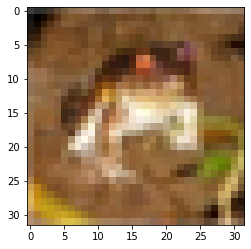

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
y_train[0]

6

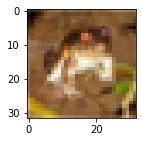

In [9]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [10]:
# Defining the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [23]:
num_classes = 10

In [11]:
classes[7]

'horse'

In [12]:
# Defining a function to plot the images
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

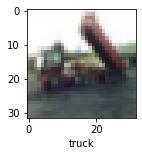

In [13]:
plot_sample(x_train, y_train, 2)

Normalizing the training data

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Build Simple ANN for image classification

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 76s 46ms/step - loss: 1.8110 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6208 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5394 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4796 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4311 - accuracy: 0.4970


In [16]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.30      0.43      1000
           1       0.59      0.63      0.61      1000
           2       0.52      0.18      0.26      1000
           3       0.31      0.43      0.36      1000
           4       0.47      0.37      0.41      1000
           5       0.50      0.26      0.35      1000
           6       0.39      0.75      0.52      1000
           7       0.66      0.42      0.52      1000
           8       0.44      0.80      0.57      1000
           9       0.49      0.58      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



Train the model with different optimizers

In [17]:
# Train the model with different optimizers

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Train with SGD optimizer
ann.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Train with RMSprop optimizer
ann.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rmsprop_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Train with Adam optimizer
ann.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adam_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 51s 64ms/step - loss: 1.5900 - accuracy: 0.4322 - val_loss: 1.5288 - val_accuracy: 0.4493
Epoch 2/5
782/782 [==============================] - 51s 65ms/step - loss: 1.5135 - accuracy: 0.4633 - val_loss: 1.4819 - val_accuracy: 0.4768
Epoch 3/5
782/782 [==============================] - 51s 65ms/step - loss: 1.4504 - accuracy: 0.4824 - val_loss: 1.4132 - val_accuracy: 0.4922
Epoch 4/5
782/782 [==============================] - 52s 66ms/step - loss: 1.4056 - accuracy: 0.4982 - val_loss: 1.4553 - val_accuracy: 0.4855
Epoch 5/5
782/782 [==============================] - 52s 66ms/step - loss: 1.3642 - accuracy: 0.5133 - val_loss: 1.4113 - val_accuracy: 0.5007
Epoch 1/5
782/782 [==============================] - 111s 124ms/step - loss: 2.3906 - accuracy: 0.3032 - val_loss: 1.8016 - val_accuracy: 0.3552
Epoch 2/5
782/782 [==============================] - 97s 124ms/step - loss: 1.6749 - accuracy: 0.4093 - val_loss: 2.0058 - val_accuracy: 0.3

Comparing the performance of the different optimizers

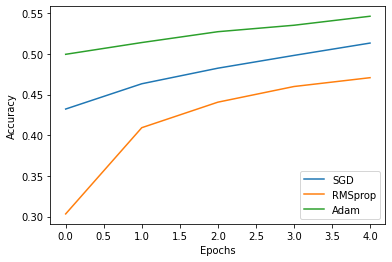

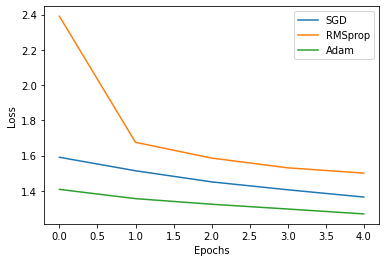

In [18]:
import matplotlib.pyplot as plt

# Compare accuracy
plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop')
plt.plot(adam_history.history['accuracy'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compare loss
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(rmsprop_history.history['loss'], label='RMSprop')
plt.plot(adam_history.history['loss'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Above code uses an Artificial Neural Network (ANN) with fully connected layers for image classification on the CIFAR-10 dataset. It compares the performance of different optimizers by plotting accuracy and loss curves.

Now building a CNN to train our images

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 35s 21ms/step - loss: 1.5557 - accuracy: 0.4366
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1808 - accuracy: 0.5823
Epoch 3/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0344 - accuracy: 0.6374
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9548 - accuracy: 0.6680
Epoch 5/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8926 - accuracy: 0.6896


In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8451 - accuracy: 0.7073
Epoch 2/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8015 - accuracy: 0.7225
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7672 - accuracy: 0.7332
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7335 - accuracy: 0.7439
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6980 - accuracy: 0.7585
